In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

sns.set(style='whitegrid', context='notebook')

In [2]:
df = pd.read_csv("C:\\Users\\Youssef ezzat\\Downloads\\Heart_Disease_Prediction.csv", delimiter=',', encoding='ascii')
print('Data loaded successfully. Shape:', df.shape)
df.head()

Data loaded successfully. Shape: (270, 14)


Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

# Data Cleaning and Preprocessing

The dataset contains a 'Heart Disease' column that is of type string. We need to encode it for modeling.


In [3]:
# Show missing values summary
print('Missing values per column:')
print(df.isnull().sum())

# Encode the target column. It could be values like 'Yes'/'No', 'Present'/'Absent', etc.
if df['Heart Disease'].dtype == 'object':
    le = LabelEncoder()
    df['Heart_Disease_Encoded'] = le.fit_transform(df['Heart Disease'])
    print('\nUnique classes in target:', le.classes_)
else:
    df['Heart_Disease_Encoded'] = df['Heart Disease']

# Display the head of the updated dataframe
df.head()

# Note: It is important to check the column names carefully. A common mistake is to confuse 'Heart Disease' with 'Heart_Disease'.
# This may lead to errors in functions such as sns.countplot, as we will see later if not corrected.

Missing values per column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Unique classes in target: ['Absence' 'Presence']


Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  Heart_Disease_Encoded  
0                        3         3      Presence                      1  
1                        0         7       Absence                      0  
2                        0         7      Presence                      1  
3                        1         7       Absence                      0  
4                        1         3       Absence                      0

# Exploratory Data Analysis

Summary statistics for numeric columns:


Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  Heart_Disease_Encoded  
count   270.000000               270.000000  270.000000             270.000000  
mean      1.585185                 0.670370    4.696296               0.444444  
std       0.614390                 0.943896    1.940659               0.497827  
min       1.000000                 0.000000    3.000000               0.000000  
25%       1.000000                 0.000000    3.000000               0.000000  
50%       2.000000                 0.000000    3.000000               0.000000  
75%       2.000000                 1.000000    7.000000               1.000000  
max       3.000000                 3.000000    7.000000               1.000000

C:\Users\Youssef ezzat\AppData\Local\Temp\ipykernel_13432\3841056466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=df, palette='Set2')


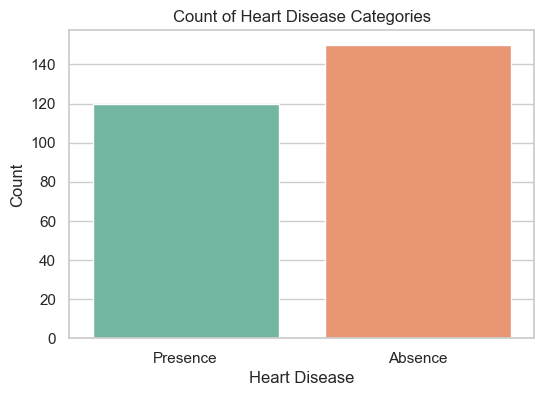

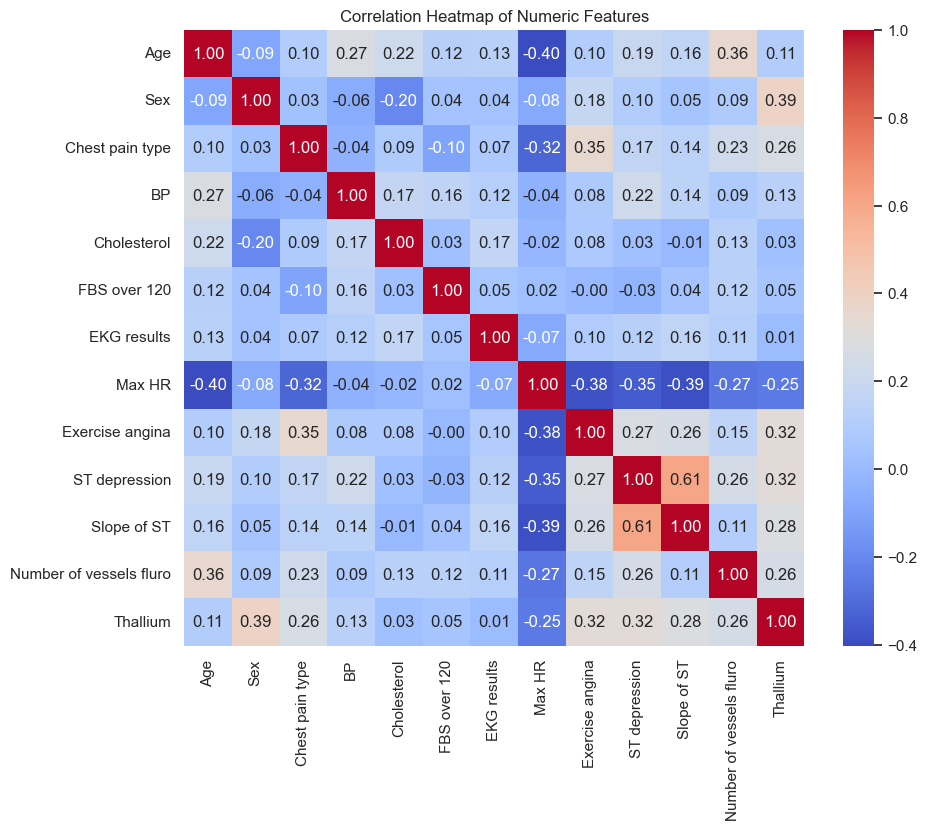

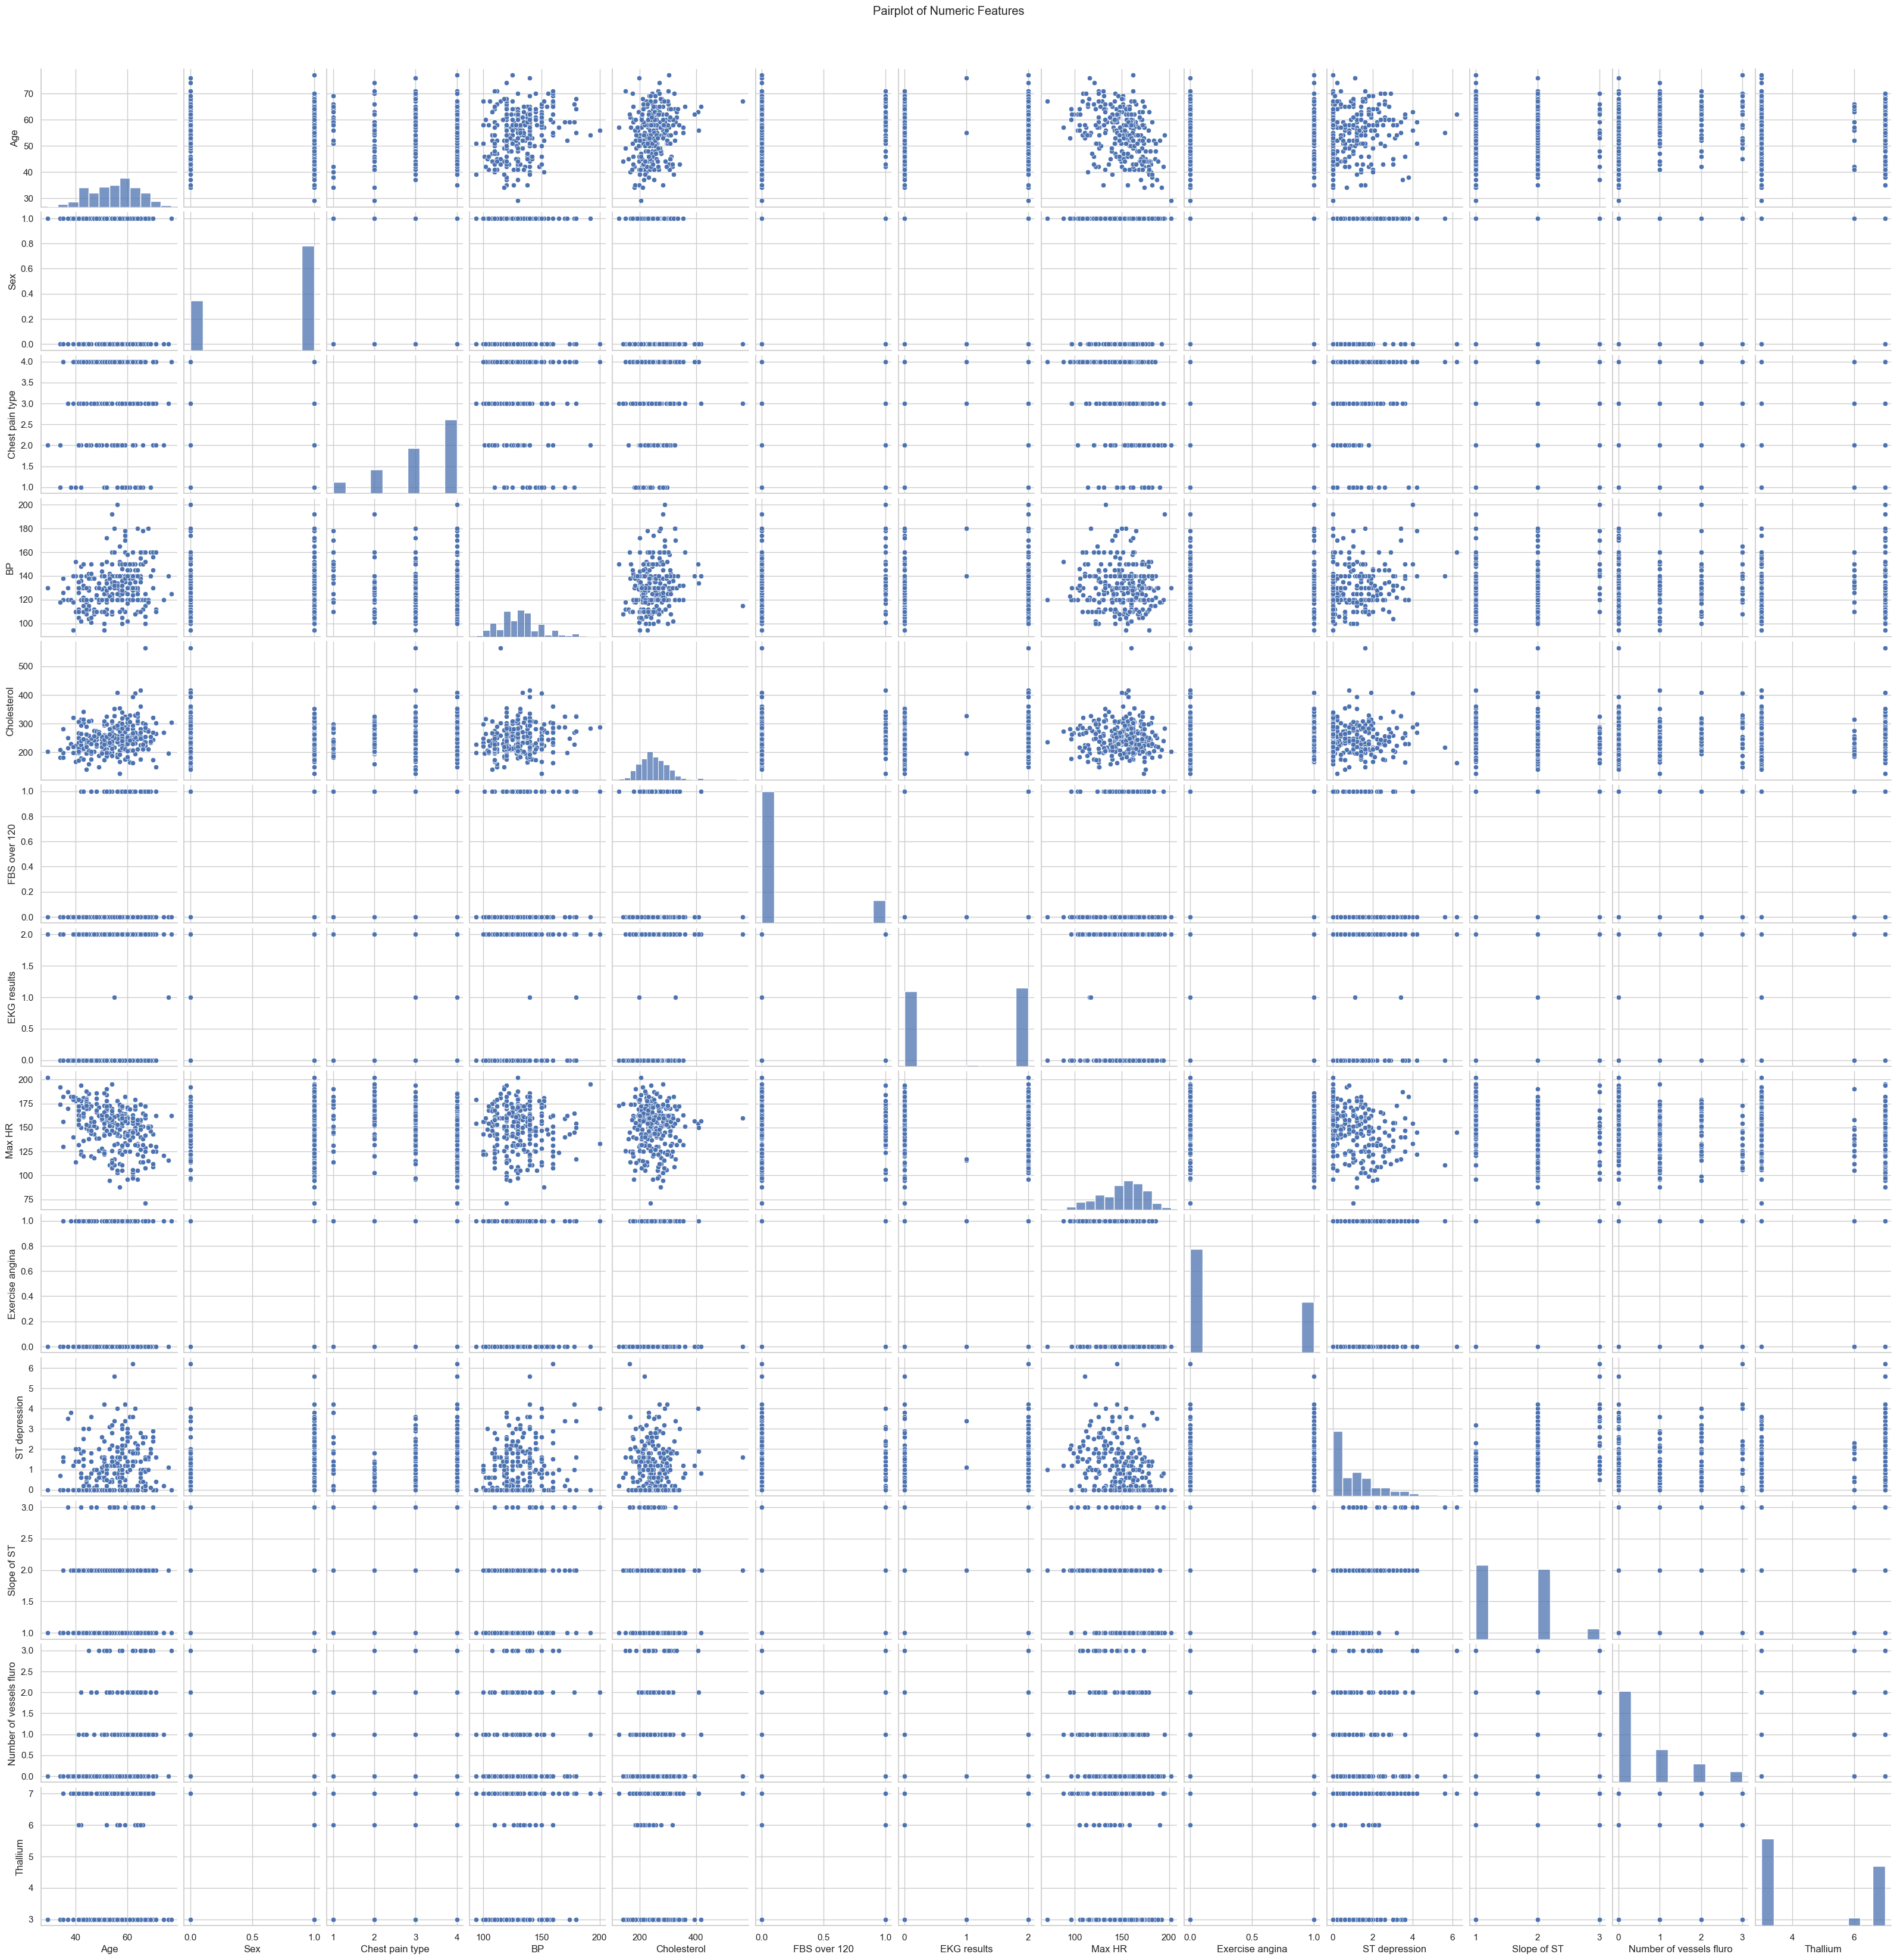

In [4]:

print('Summary statistics for numeric columns:')
display(df.describe())

# Check the distribution of the target variable using the proper column name 'Heart Disease'
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df, palette='Set2')
plt.title('Count of Heart Disease Categories')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Correlation heatmap among numerical features
# We first select only numeric columns. Some columns such as our encoded target may need to be dropped for analysis.
numeric_df = df.select_dtypes(include=[np.number])
if 'Heart_Disease_Encoded' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Heart_Disease_Encoded'])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Pairplot to visualize pairwise relationships among numeric features
# We use the numeric dataframe columns from the original df to avoid plotting non-numeric columns if any.
sns.pairplot(df[numeric_df.columns])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Note: Earlier errors regarding the interpretation of column names were resolved by ensuring that
# we use the exact column names as they appear in the data ('Heart Disease' with a space, not 'Heart_Disease').

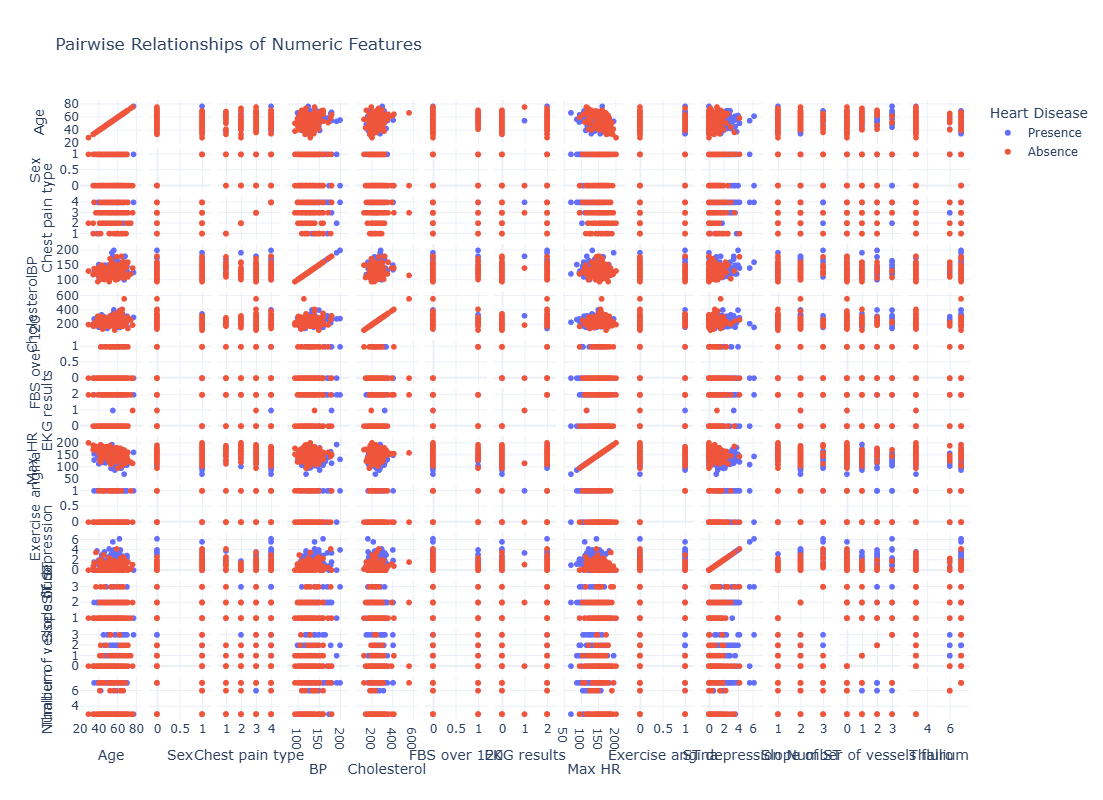

In [5]:

# Remove missing values if present
numeric_df = numeric_df.dropna()

# Define color variable (ensure it exists)
color_var = 'Heart Disease'

if color_var in df.columns:
    fig = px.scatter_matrix(
        numeric_df,
        dimensions=numeric_df.columns,
        color=df[color_var],
        title="Pairwise Relationships of Numeric Features",
        labels={'color': color_var},
        template='plotly_white'
    )
    
    # Adjustments for better visibility
    fig.update_layout(
        width=1000,
        height=800,
        font_size=12
    )
    
    # Try adjusting diagonal plots (this might need tweaking based on Plotly version)
    # fig.update_traces(diagonal_visible=False)
    
    fig.show()
else:
    print(f"Column '{color_var}' not found in the dataframe.")


# Predictive Modeling

 We create a logistic regression predictor to classify whether heart disease is present or absent


Training set shape: (216, 13) Test set shape: (54, 13)
Prediction accuracy: 0.9259259259259259


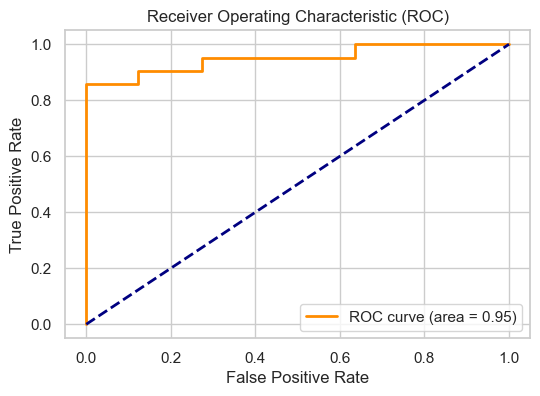

In [6]:
# Features: All columns except the target and its encoded version
feature_cols = [col for col in df.columns if col not in ['Heart Disease', 'Heart_Disease_Encoded']]
X = df[feature_cols]

# Target: Use the encoded target variable
y = df['Heart_Disease_Encoded']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set shape:', X_train.shape, 'Test set shape:', X_test.shape)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Prediction accuracy:', accuracy)

# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
# Note: Future iterations could include more advanced models and an in-depth hyperparameter search.


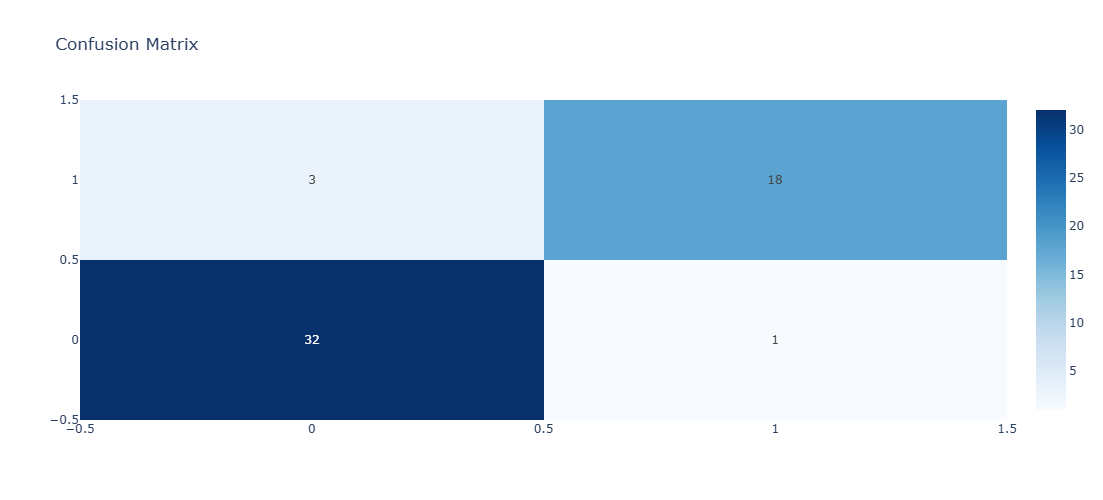

In [7]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig = go.Figure(data=[go.Heatmap(
    z=cm,
    text=cm,
    texttemplate='%{text}',
    hoverinfo='text',
    colorscale='Blues'
)])

fig.update_layout(title='Confusion Matrix', width=600, height=500)
fig.show()


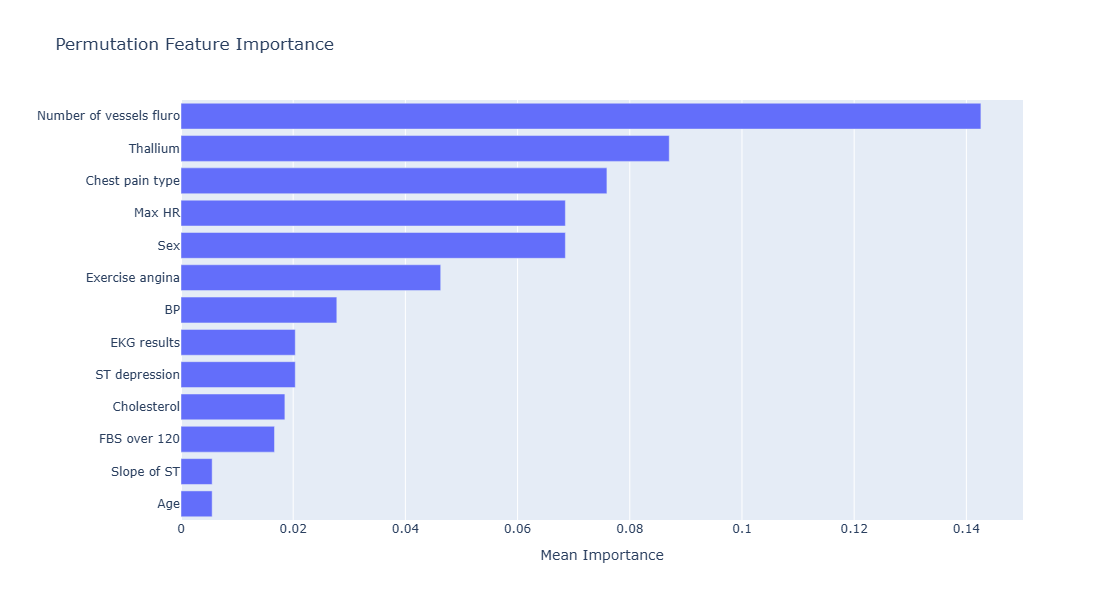

In [8]:

# Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
feature_importance = pd.Series(result.importances_mean, index=feature_cols).sort_values()

fig = go.Figure(data=[go.Bar(
    x=feature_importance.values,
    y=feature_importance.index,
    orientation='h'
)])

fig.update_layout(title='Permutation Feature Importance', width=800, height=600,
                  xaxis_title='Mean Importance', yaxis_title='')
fig.show()


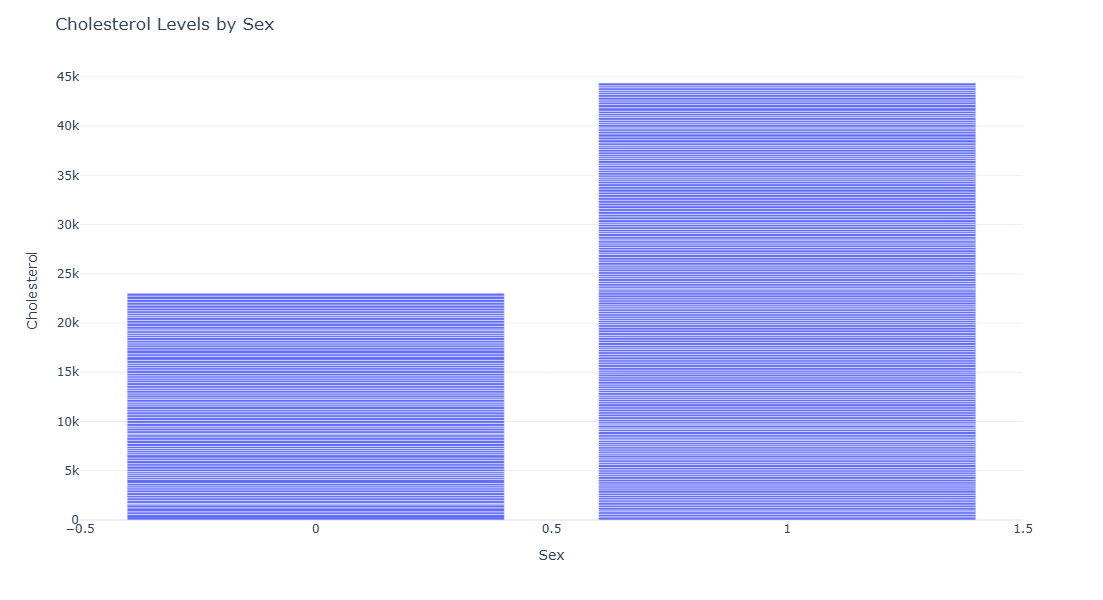

In [9]:
# Grouped Barplot
fig = px.bar(df, x='Sex', y='Cholesterol', template='plotly_white')
fig.update_layout(title='Cholesterol Levels by Sex', width=800, height=600,
                  xaxis_title='Sex', yaxis_title='Cholesterol')
fig.show()


## Conclusion and Future Work

 we explored a classic heart disease dataset through a variety of visualizations and created a logistic regression model to predict heart disease presence. We encountered and resolved a common pitfall regarding column naming—in this case, ensuring that the target column name exactly matches what is in the data.

The modeling approach using logistic regression provided a baseline prediction accuracy with insights from the confusion matrix, ROC curve, and permutation feature importance. Future work could expand this analysis to include more complex models such as random forests or gradient boosting, as well as a more detailed feature engineering process.
